In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

FEATURES_DATA_PATH = "../data/features/"


In [3]:
outages = pd.read_csv(FEATURES_DATA_PATH + "california_outages_with_fire_features.csv")
daily_fires = pd.read_csv(FEATURES_DATA_PATH + "daily_wildfire_aggregations.csv")
monthly_fires = pd.read_csv(FEATURES_DATA_PATH + "monthly_wildfire_aggregations.csv")

print("Outages with features:", outages.shape)
print("Daily fires:", daily_fires.shape)
print("Monthly fires:", monthly_fires.shape)


Outages with features: (210, 35)
Daily fires: (8766, 11)
Monthly fires: (288, 6)


In [4]:
print(outages.columns)

Index(['outage_date', 'outage_year', 'outage_month', 'outage_dayofweek',
       'outage_quarter', 'season', 'is_wildfire_season', 'is_weekend',
       'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'OUTAGE.DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'duration_category',
       'impact_category', 'is_wildfire_related', 'daily_fire_count',
       'daily_acres_burned', 'avg_fire_size', 'max_fire_size',
       'large_fire_count', 'large_fire_acres', 'satellite_detections',
       'total_frp', 'avg_frp', 'max_frp', 'avg_confidence', 'fires_7day',
       'fires_30day', 'acres_7day', 'acres_30day', 'is_high_severity',
       'is_long_duration', 'has_active_fire', 'is_high_fire_activity'],
      dtype='object')


In [5]:
print(outages.head(5))

  outage_date  outage_year  outage_month  outage_dayofweek  outage_quarter  \
0  2007-09-04         2007             9                 1               3   
1  2008-05-08         2008             5                 3               2   
2  2006-05-19         2006             5                 4               2   
3  2015-10-13         2015            10                 1               4   
4  2014-02-06         2014             2                 3               1   

   season  is_wildfire_season  is_weekend                 CAUSE.CATEGORY  \
0    Fall                   1           0                 severe weather   
1  Spring                   0           0  system operability disruption   
2  Spring                   0           0                 severe weather   
3    Fall                   1           0                  public appeal   
4  Winter                   0           0          fuel supply emergency   

  CAUSE.CATEGORY.DETAIL  OUTAGE.DURATION  DEMAND.LOSS.MW  CUSTOMERS.AFFECT

In [7]:
# Make sure outage_date is a proper datetime
outages["outage_date"] = pd.to_datetime(outages["outage_date"])

print("Shape (rows, columns):", outages.shape)
print("\nColumn types:")
print(outages.dtypes)

print("\nDate range:")
print(outages["outage_date"].min(), "→", outages["outage_date"].max())


Shape (rows, columns): (210, 35)

Column types:
outage_date              datetime64[ns]
outage_year                       int64
outage_month                      int64
outage_dayofweek                  int64
outage_quarter                    int64
season                           object
is_wildfire_season                int64
is_weekend                        int64
CAUSE.CATEGORY                   object
CAUSE.CATEGORY.DETAIL            object
OUTAGE.DURATION                 float64
DEMAND.LOSS.MW                  float64
CUSTOMERS.AFFECTED              float64
duration_category                object
impact_category                  object
is_wildfire_related               int64
daily_fire_count                float64
daily_acres_burned              float64
avg_fire_size                   float64
max_fire_size                   float64
large_fire_count                float64
large_fire_acres                float64
satellite_detections            float64
total_frp                       

In [8]:
# Missing values count (sorted)
missing_values = outages.isna().sum().sort_values(ascending=False)
missing_values


CAUSE.CATEGORY.DETAIL    100
CUSTOMERS.AFFECTED        83
DEMAND.LOSS.MW            52
OUTAGE.DURATION           12
acres_30day                4
acres_7day                 4
fires_30day                4
fires_7day                 4
avg_confidence             0
satellite_detections       0
total_frp                  0
avg_frp                    0
max_frp                    0
outage_date                0
large_fire_count           0
is_high_severity           0
is_long_duration           0
has_active_fire            0
large_fire_acres           0
daily_acres_burned         0
max_fire_size              0
avg_fire_size              0
outage_year                0
daily_fire_count           0
is_wildfire_related        0
impact_category            0
duration_category          0
CAUSE.CATEGORY             0
is_weekend                 0
is_wildfire_season         0
season                     0
outage_quarter             0
outage_dayofweek           0
outage_month               0
is_high_fire_a

Missing Percentage (%)


<Axes: title={'center': 'Top 20 Columns by Missing %'}>

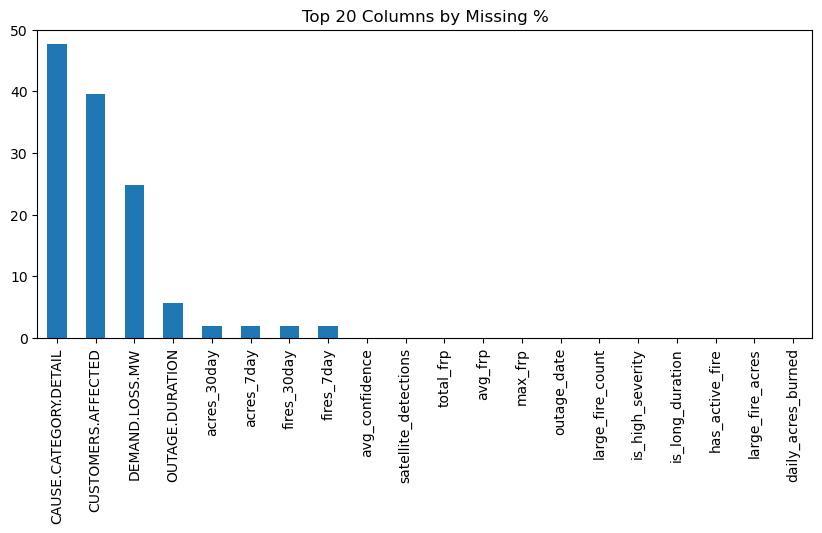

In [9]:
missing_pct = (outages.isna().mean() * 100).sort_values(ascending=False)

print("Missing Percentage (%)")
missing_pct

missing_pct.head(20).plot(
    kind="bar",
    figsize=(10,4),
    title="Top 20 Columns by Missing %"
)



In [10]:
outages.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
outage_date,210,NaN,NaN,NaN,2009-10-09 22:10:17.142857216,2000-06-14 00:00:00,2007-05-11 00:00:00,2010-01-19 00:00:00,2013-02-28 00:00:00,2016-04-02 00:00:00,NaN
outage_year,210.0,NaN,NaN,NaN,2009.271429,2000.0,2007.0,2010.0,2013.0,2016.0,4.043737
outage_month,210.0,NaN,NaN,NaN,6.585714,1.0,4.0,7.0,10.0,12.0,3.443986
outage_dayofweek,210.0,NaN,NaN,NaN,2.590476,0.0,1.0,3.0,4.0,6.0,1.902882
outage_quarter,210.0,NaN,NaN,NaN,2.533333,1.0,2.0,3.0,4.0,4.0,1.137164
season,210,4,Summer,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_wildfire_season,210.0,NaN,NaN,NaN,0.490476,0.0,0.0,0.0,1.0,1.0,0.501104
is_weekend,210.0,NaN,NaN,NaN,0.190476,0.0,0.0,0.0,0.0,1.0,0.393615
CAUSE.CATEGORY,210,7,severe weather,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSE.CATEGORY.DETAIL,110,26,vandalism,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
categorical_cols = [
    "CAUSE.CATEGORY", 
    "CAUSE.CATEGORY.DETAIL", 
    "season",
    "duration_category", 
    "impact_category"
]

for col in categorical_cols:
    if col in outages.columns:
        print(f"\n--- {col} ---")
        print(outages[col].value_counts(dropna=False))



--- CAUSE.CATEGORY ---
CAUSE.CATEGORY
severe weather                   70
system operability disruption    41
islanding                        28
intentional attack               24
equipment failure                21
fuel supply emergency            17
public appeal                     9
Name: count, dtype: int64

--- CAUSE.CATEGORY.DETAIL ---
CAUSE.CATEGORY.DETAIL
NaN                          100
vandalism                     17
wildfire                      16
winter storm                  12
storm                         10
generator trip                 9
heatwave                       8
Hydro                          5
transmission interruption      5
thunderstorm                   4
 Natural Gas                   4
heavy wind                     3
uncontrolled loss              2
wind/rain                      2
switching                      1
fog                            1
plant trip                     1
wind storm                     1
lightning                      1
sus

# 🔹 Step 3: Univariate Exploratory Data Analysis (EDA)

In this step, we explore the distribution of individual features:

1. Numeric Features
- Outage duration
- Customers affected
- Demand loss (MW)
- Daily and rolling wildfire metrics (7-day, 30-day windows)

2. Categorical Features
- Outage causes
- Duration categories
- Impact categories
- Seasons

3. Binary Flags
- Wildfire-related indicator
- High severity indicator
- Fire season indicator
- High fire activity indicator




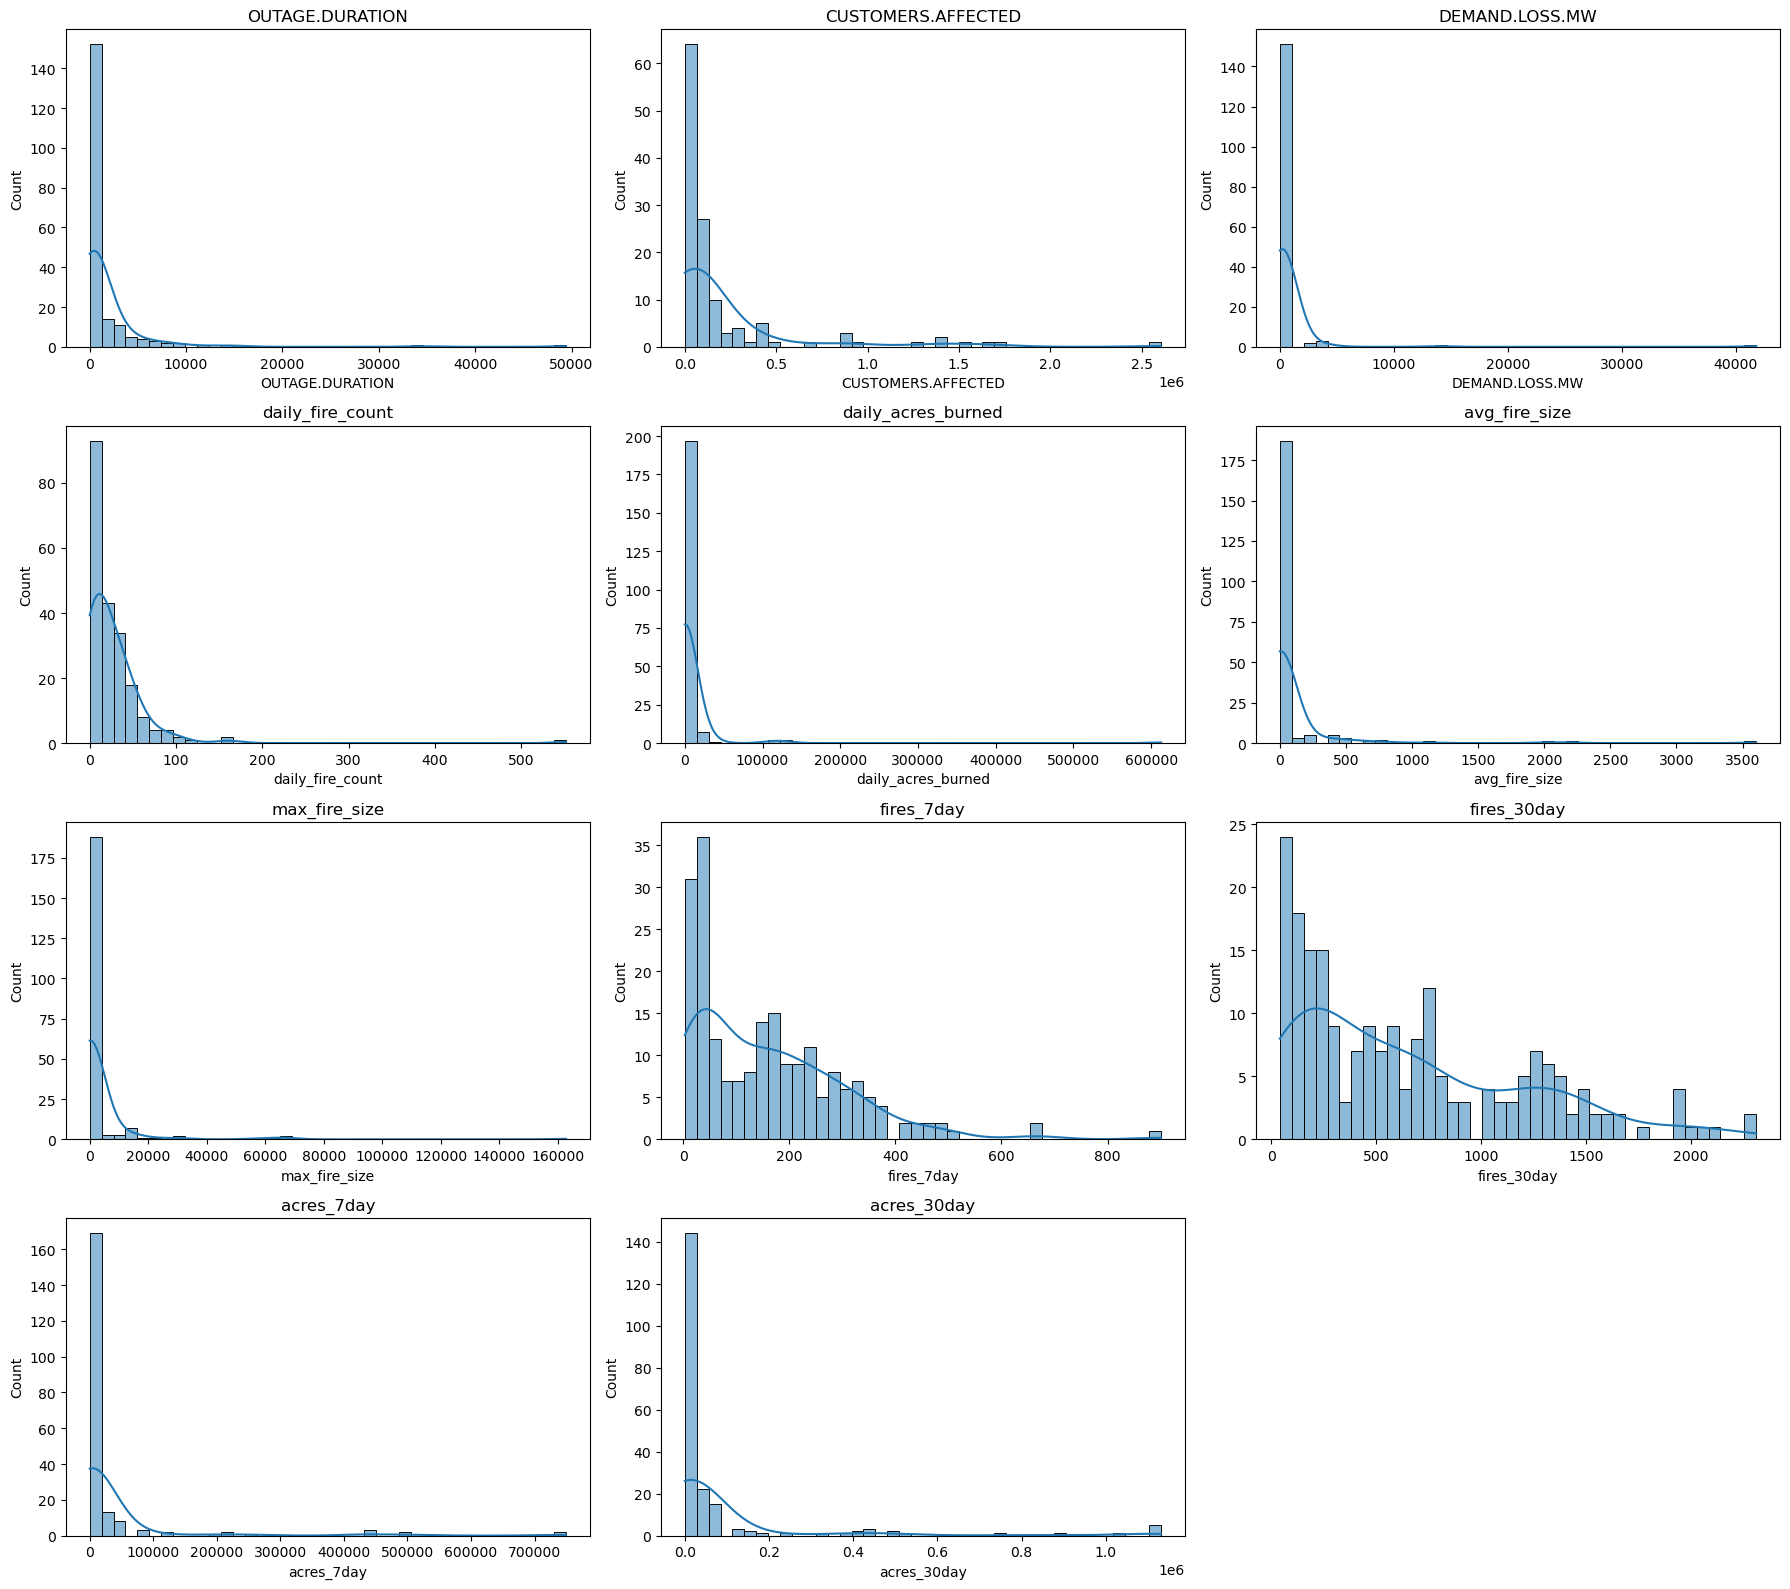

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = [
    "OUTAGE.DURATION",
    "CUSTOMERS.AFFECTED",
    "DEMAND.LOSS.MW",
    "daily_fire_count",
    "daily_acres_burned",
    "avg_fire_size",
    "max_fire_size",
    "fires_7day",
    "fires_30day",
    "acres_7day",
    "acres_30day",
]

# Filter columns that actually exist
numeric_cols = [col for col in numeric_cols if col in outages.columns]

# Create a grid of subplots
n = len(numeric_cols)
cols = 3  # number of columns in grid
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(outages[col], bins=40, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


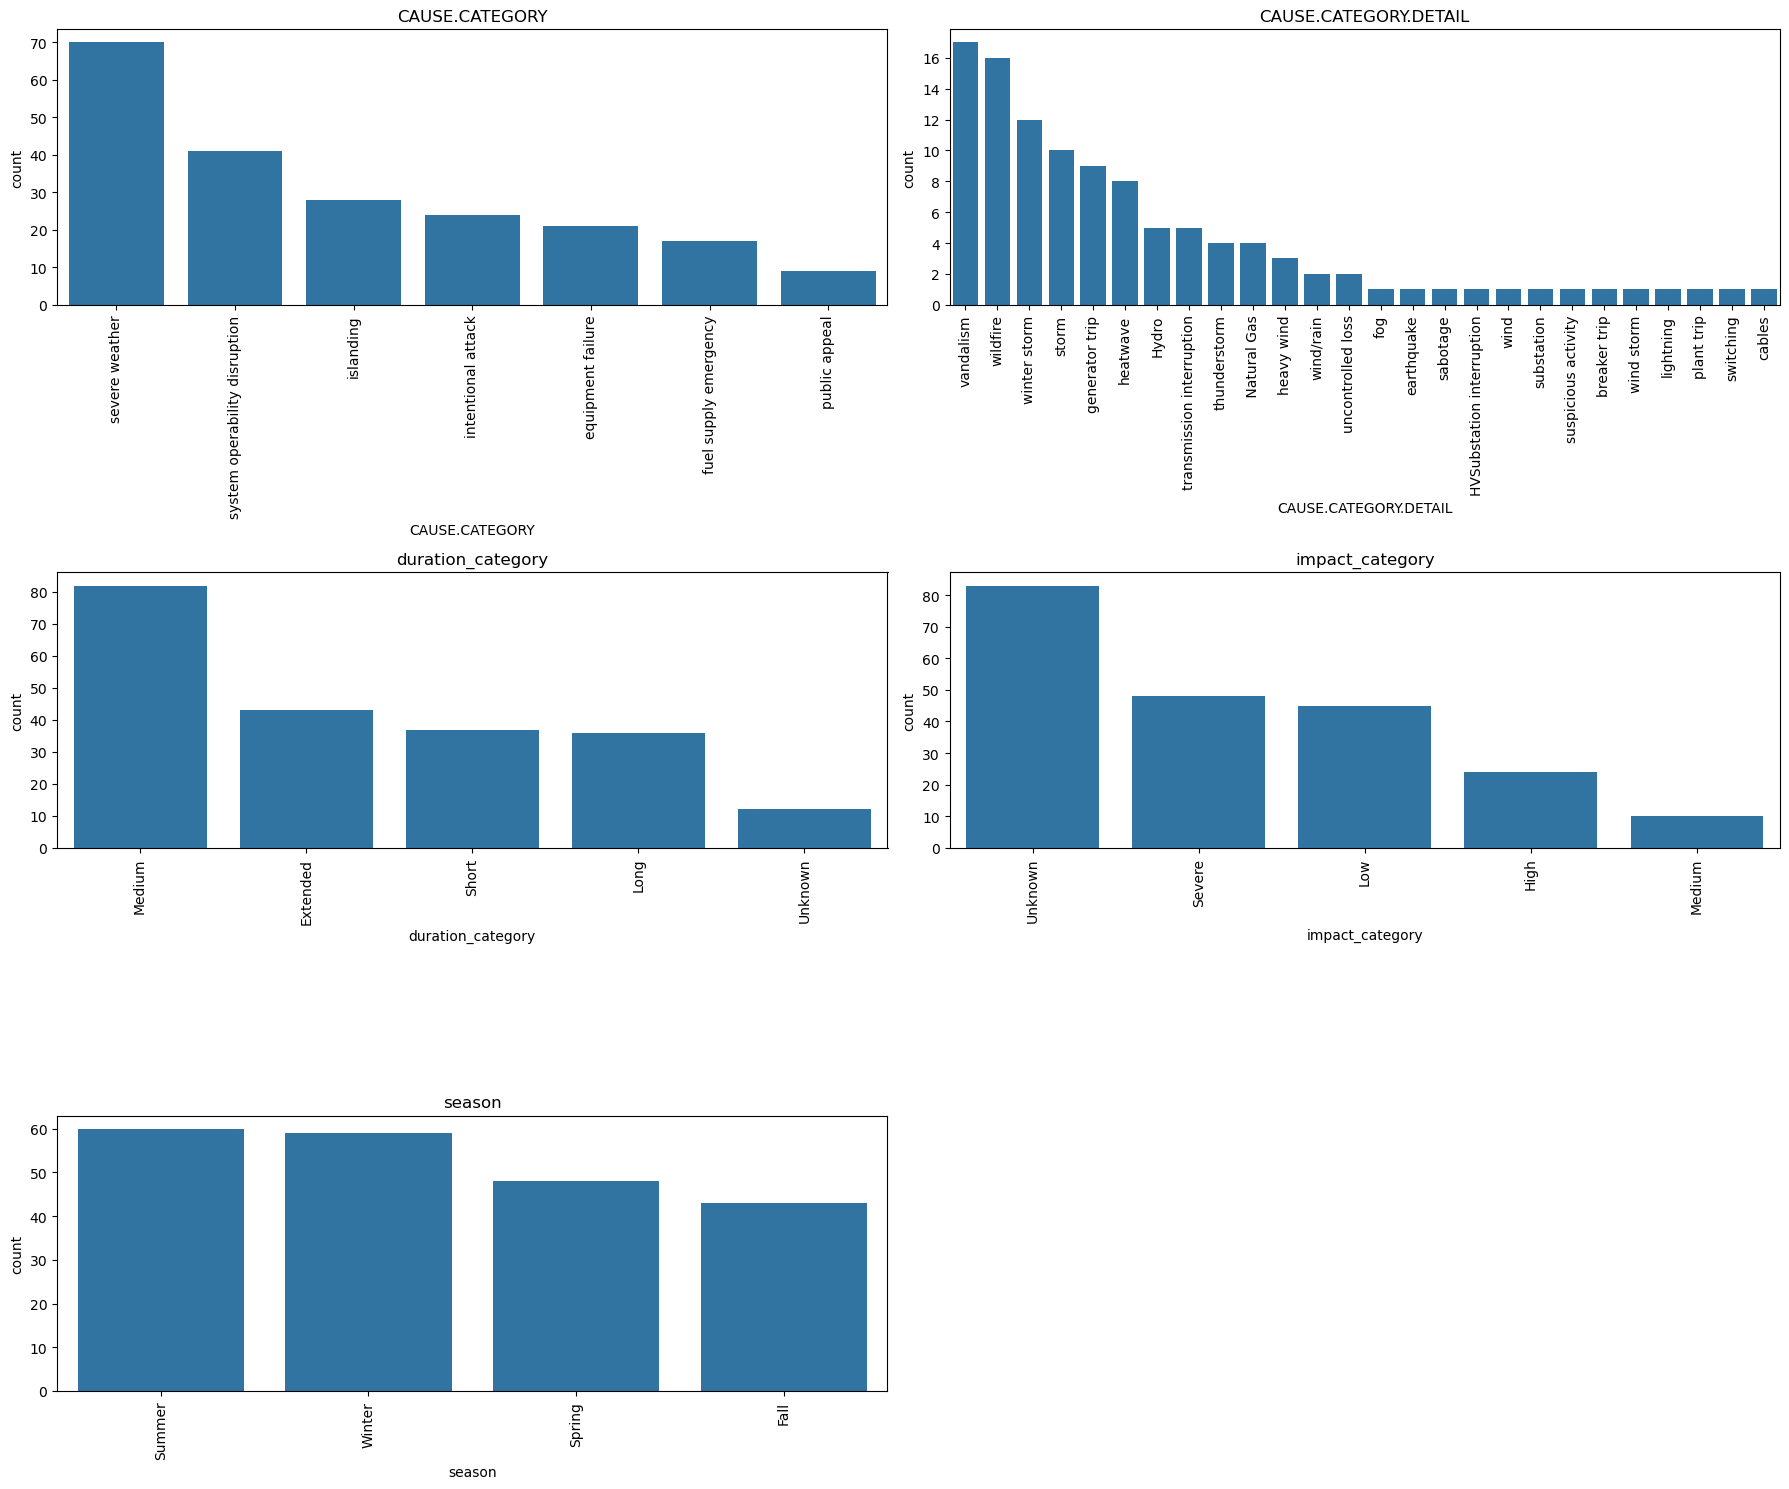

In [22]:
categorical_cols = [
    "CAUSE.CATEGORY",
    "CAUSE.CATEGORY.DETAIL",
    "duration_category",
    "impact_category",
    "season",
]

categorical_cols = [col for col in categorical_cols if col in outages.columns]

n = len(categorical_cols)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    order = outages[col].value_counts().index
    sns.countplot(data=outages, x=col, order=order)
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


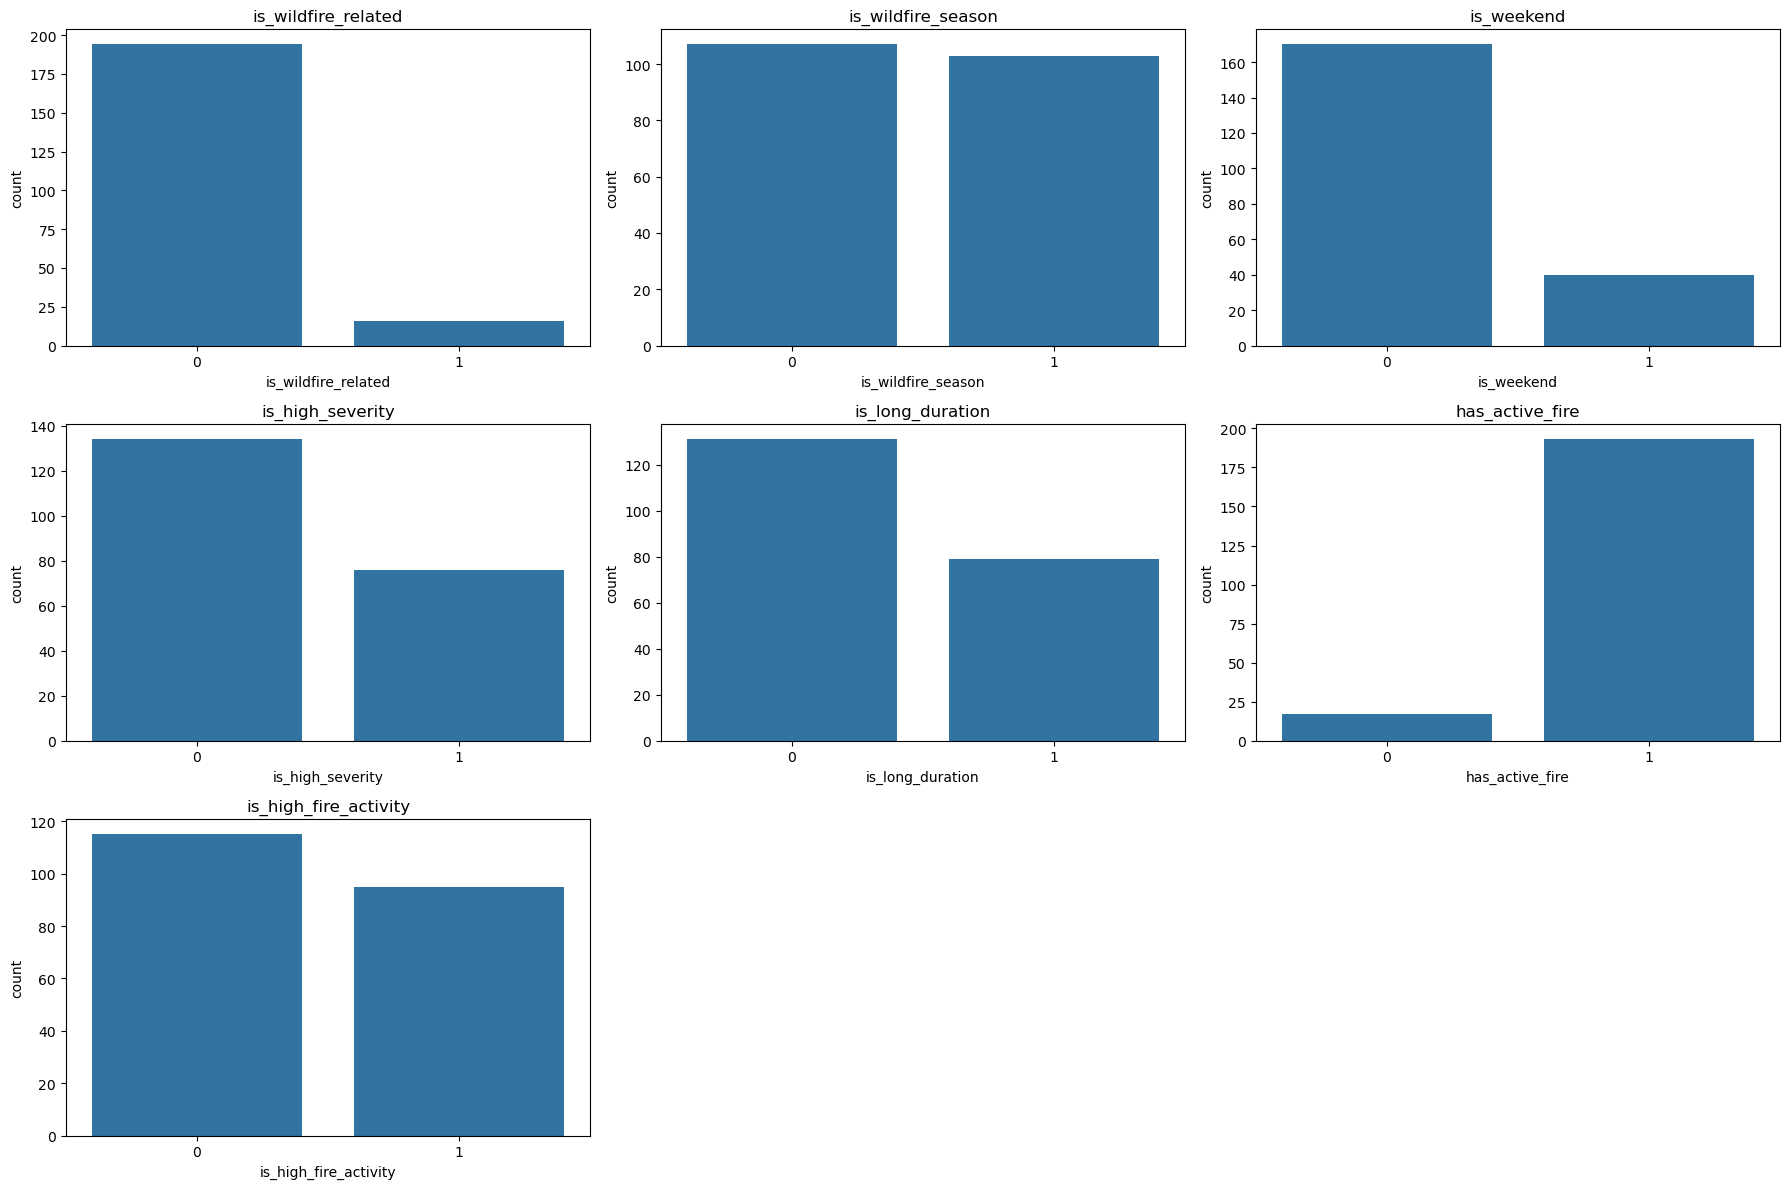

In [23]:
binary_cols = [
    "is_wildfire_related",
    "is_wildfire_season",
    "is_weekend",
    "is_high_severity",
    "is_long_duration",
    "has_active_fire",
    "is_high_fire_activity",
]

binary_cols = [col for col in binary_cols if col in outages.columns]

n = len(binary_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=outages, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


Key Findings from Numeric Distributions

Outage duration, customer impact, and demand loss are all highly right-skewed, indicating a few extreme events drive most of the magnitude.

Daily and rolling wildfire metrics show similar heavy-tail patterns, confirming wildfire activity is sporadic but severe during peak periods.

7-day and 30-day rolling metrics effectively capture prolonged fire seasons and clustering of wildfire activity.



Insights from Categorical Features

“Severe weather” is the leading outage cause, followed by system disruptions and equipment failures.

Duration categories show a healthy mix, with “Medium” being most common, while impact categories contain many “Unknown” values.

Outages occur across all seasons, with Summer and Winter slightly dominating.



Insights from Binary Feature Distributions

Only a small portion of outages are wildfire-related, indicating strong class imbalance.

Most outages occur on weekdays and are not classified as high-severity or long-duration.

A large share of outages occur during periods with active fires, suggesting indirect wildfire influence beyond direct fire damage.



Overall Summary

The dataset contains rare but impactful outage and wildfire events.

Strong skewness across variables suggests the need for transformations during modeling.

Wildfire activity and outages both show significant variability, highlighting the importance of temporal and contextual features in later analysis.

# 🔹 Step 4: Temporal Analysis of Outages

In this step, we analyze how outages evolve over time:

1. Time-Based Trends
- Outages per year
- Outages per month
- Seasonal outage patterns (Winter, Spring, Summer, Fall)

2. Wildfire Over Time
- Wildfire vs non-wildfire outage trends by year
- Outages during wildfire season vs outside fire season

This step reveals seasonal and multi-year patterns and helps confirm relationships with wildfire seasons.


In [24]:
# Ensure outage_date is datetime
outages["outage_date"] = pd.to_datetime(outages["outage_date"])

# Extract year, month, and season (already exists but safer to reassign)
outages["year"] = outages["outage_date"].dt.year
outages["month"] = outages["outage_date"].dt.month
outages["year_month"] = outages["outage_date"].dt.to_period("M")


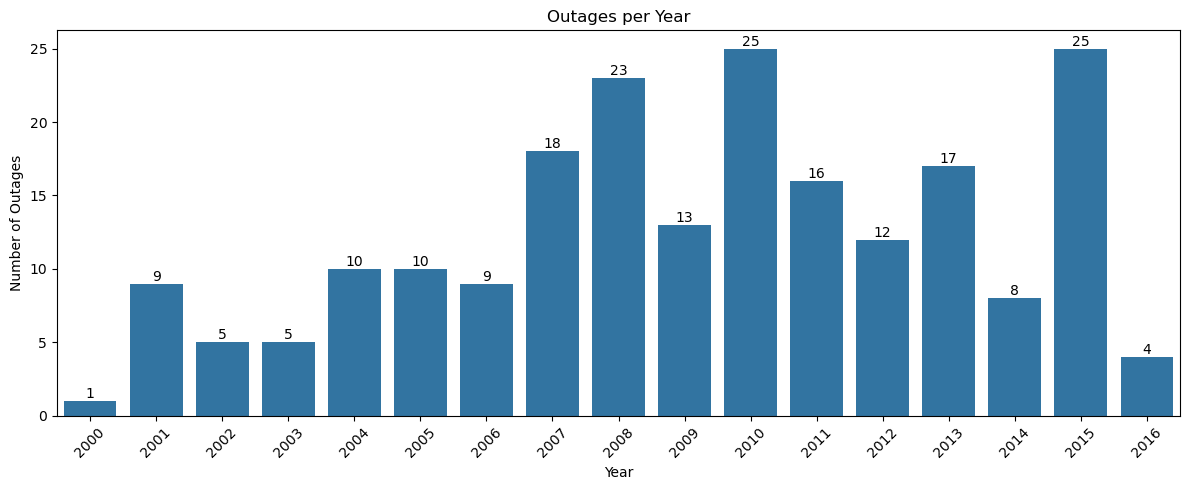

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Yearly outage count
yearly_counts = outages.groupby("year").size()

plt.figure(figsize=(12,5))
ax=sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
ax.bar_label(ax.containers[0],padding=0)
plt.title("Outages per Year")
plt.xlabel("Year")
plt.ylabel("Number of Outages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



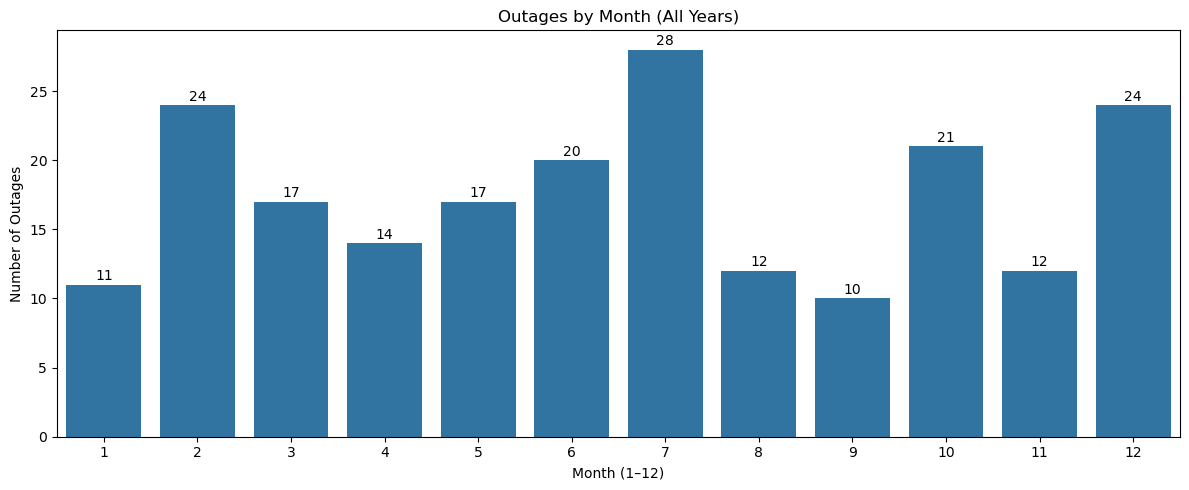

In [32]:
monthly_counts = outages.groupby("month").size()

plt.figure(figsize=(12,5))
ax=sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
ax.bar_label(ax.containers[0], padding=1)
plt.title("Outages by Month (All Years)")
plt.xlabel("Month (1–12)")
plt.ylabel("Number of Outages")
plt.tight_layout()
plt.show()


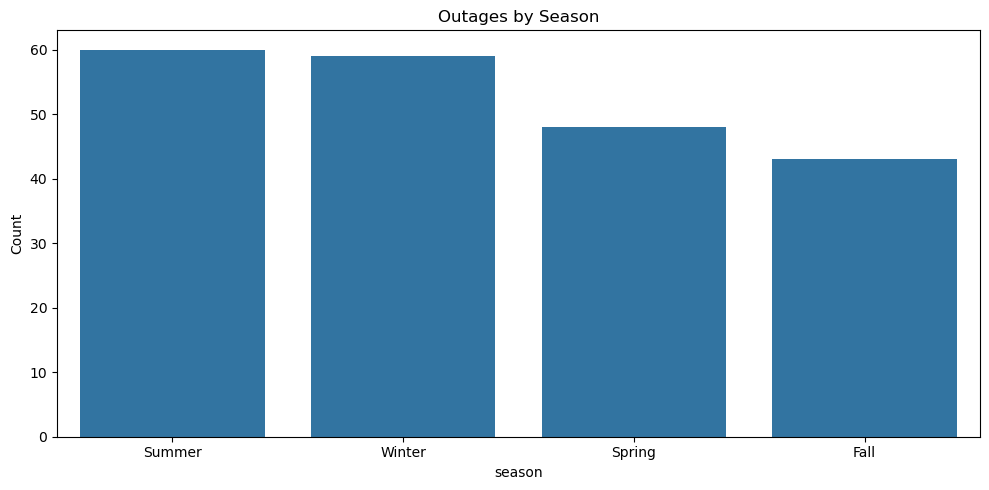

In [33]:
if "season" in outages.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=outages, x="season", order=outages["season"].value_counts().index)
    plt.title("Outages by Season")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    outages["season"].value_counts()


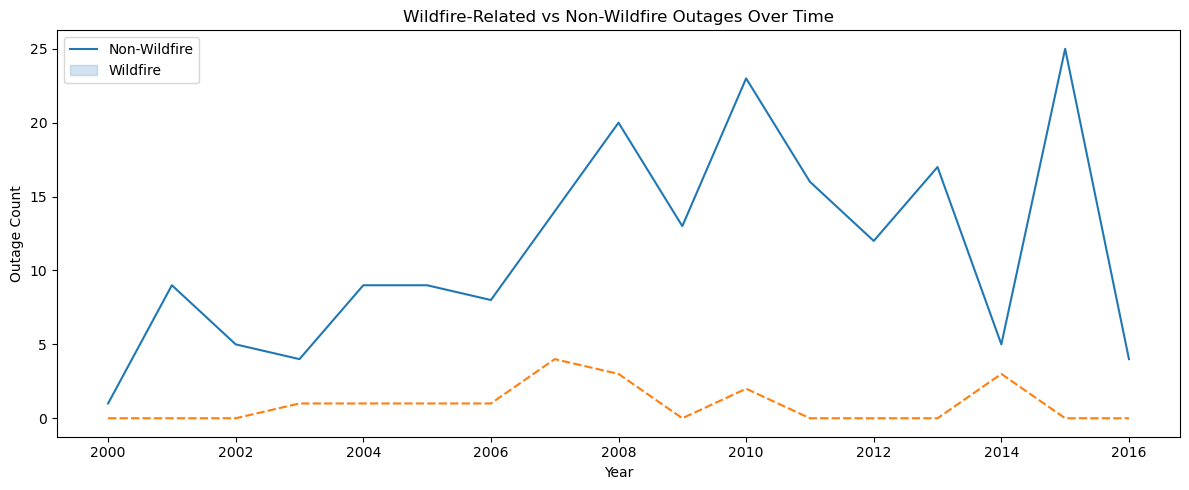

In [34]:
if "is_wildfire_related" in outages.columns:
    # Group by year and wildfire flag
    yearly_fire_split = outages.groupby(["year", "is_wildfire_related"]).size().unstack(fill_value=0)

    plt.figure(figsize=(12,5))
    sns.lineplot(data=yearly_fire_split)
    plt.title("Wildfire-Related vs Non-Wildfire Outages Over Time")
    plt.xlabel("Year")
    plt.ylabel("Outage Count")
    plt.legend(["Non-Wildfire", "Wildfire"])
    plt.tight_layout()
    plt.show()

    yearly_fire_split


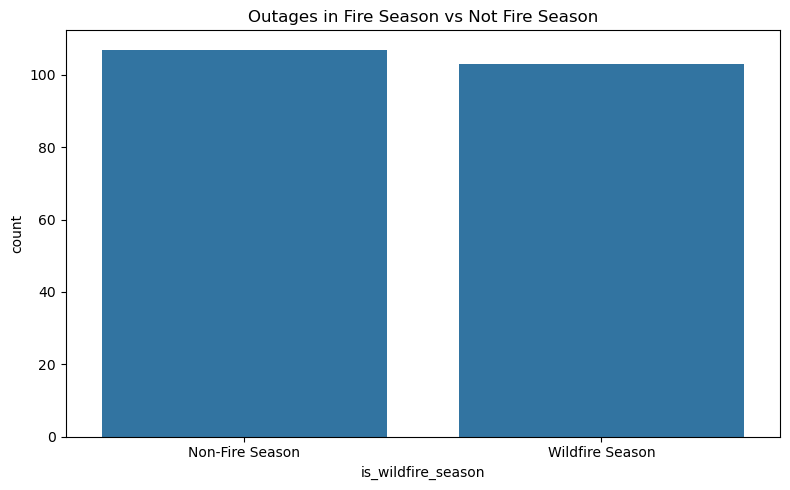

In [35]:
if "is_wildfire_season" in outages.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=outages, x="is_wildfire_season")
    plt.xticks([0,1], ["Non-Fire Season", "Wildfire Season"])
    plt.title("Outages in Fire Season vs Not Fire Season")
    plt.tight_layout()
    plt.show()

    outages["is_wildfire_season"].value_counts()


1️⃣ Outages Per Year
Insights:

Outages show a steady upward trend from 2000 to 2010, peaking at 25 outages in 2010.

The years 2007–2010 show the highest concentration of outages, indicating a period of grid stress or adverse conditions.

After 2010, outage counts fluctuate but remain relatively high until a sharp drop in 2016.

Overall pattern suggests increasing outage frequency over the early-to-mid 2000s, potentially tied to aging infrastructure or environmental changes.

2️⃣ Outages Per Month (Across All Years)
Insights:

July has the highest number of outages (28), aligning with peak summer heat and wildfire season.

February and December also show high outage counts (24 each), indicating winter storms likely contribute significantly.

Fall months (Sep–Nov) have comparatively fewer outages.

Outage patterns are therefore bimodal, peaking in Summer (wildfire season) and Winter (storm season).

3️⃣ Outages by Season
Insights:

Outages are most common in Summer and Winter, showing nearly equal high counts.

Spring and Fall experience fewer outages, with Fall being the lowest.

This reinforces that extreme weather seasons (hot summers and stormy winters) drive the majority of outages.

Seasonal distribution shows that outages are not solely driven by wildfire season, but also by non-fire weather conditions.

4️⃣ Wildfire-Related vs Non-Wildfire Outages Over Time
Insights:

Non-wildfire outages dominate across all years, vastly outnumbering wildfire-induced outages.

Wildfire outages show small but noticeable spikes in certain years (e.g., 2007–2008, 2014–2015), corresponding with known severe wildfire seasons.

The gap between wildfire and non-wildfire outages remains consistently large, reinforcing that wildfire-specific outages are a minority.

However, the presence of wildfire outage spikes during major fire years suggests a clear correlation with large fire events.

5️⃣ Outages in Fire Season vs Non-Fire Season
Insights:

Outages are almost evenly split between wildfire season and non-wildfire season.

This indicates that wildfire season alone does not guarantee more outages, since winter storms and other weather events are also major drivers.

However, coupling this with wildfire-specific analysis (in later steps) shows indirect fire impacts likely contribute outside traditional peak seasons.

Seasonal outage frequency highlights the need to analyze wildfires as just one of multiple environmental outage drivers.

# 🔹 Step 5: Wildfire vs Non-Wildfire Outages

In this step, we directly compare outages caused by wildfires with all other outages.

1. Comparison Dimensions
- Outage duration
- Customers affected
- Demand loss (MW)
- High-severity outage rates
- Fire activity around outage days (daily, 7-day, 30-day)
- Cause category patterns

This step identifies the unique characteristics of wildfire-induced outages and their impact severity.


In [36]:
# Summary of numeric columns grouped by wildfire flag
compare_cols = [
    "OUTAGE.DURATION",
    "CUSTOMERS.AFFECTED",
    "DEMAND.LOSS.MW",
    "daily_fire_count",
    "daily_acres_burned",
    "fires_7day",
    "fires_30day",
    "acres_7day",
    "acres_30day",
]

compare_cols = [col for col in compare_cols if col in outages.columns]

outages.groupby("is_wildfire_related")[compare_cols].describe()


OUTAGE.DURATION                                          \
                              count         mean          std   min     25%   
is_wildfire_related                                                           
0                             184.0  1575.804348  4320.820487   0.0  124.75   
1                              14.0  2856.214286  9087.796214  13.0   39.50   

                                             CUSTOMERS.AFFECTED  \
                       50%      75%      max              count   
is_wildfire_related                                               
0                    294.5  1093.75  49427.0              115.0   
1                    308.5   909.25  34390.0               12.0   

                                                                             \
                              mean            std    min       25%      50%   
is_wildfire_related                                                           
0                    189362.026087  396745.045527    0.0    682.50  59458.0   
1                    316401.083333  512703.764060  426.0  51187.25  99161.5   

                                         DEMAND.LOSS.MW              \
                          75%        max          count        mean   
is_wildfire_related                                                   
0                    147611.5  2606931.0          144.0  655.680556   
1                    225000.0  1400000.0           14.0  790.142857   

                                                                        \
                             std    min     25%    50%    75%      max   
is_wildfire_related                                                      
0                    3662.177679    0.0   30.75  173.0  310.5  41788.0   
1                    1208.051442  119.0  208.75  290.0  522.0   3900.0   

                    daily_fire_count                                          \
                               count       mean        std  min    25%   50%   
is_wildfire_related                                                            
0                              194.0  25.865979  46.817611  0.0   3.00  16.0   
1                               16.0  34.125000  14.641835  2.0  27.75  36.0   

                                 daily_acres_burned                \
                      75%    max              count          mean   
is_wildfire_related                                                 
0                    33.0  552.0              194.0   5949.577371   
1                    42.5   52.0               16.0  18430.484375   

                                                                          \
                              std   min       25%        50%         75%   
is_wildfire_related                                                        
0                    46389.592713   0.0    1.0875     13.975    239.6775   
1                    28218.297296  15.2  641.3300  13272.565  27762.2000   

                              fires_7day                                \
                          max      count        mean         std   min   
is_wildfire_related                                                      
0                    612702.1      190.0  155.010526  145.334753   3.0   
1                    115296.8       16.0  218.750000  111.263950  64.0   

                                                 fires_30day              \
                        25%    50%    75%    max       count        mean   
is_wildfire_related                                                        
0                     34.00  125.5  244.0  901.0       190.0  634.626316   
1                    173.25  193.0  273.0  443.0        16.0  932.125000   

                                                                        \
                            std    min     25%    50%      75%     max   
is_wildfire_related                                                      
0                    543.573433   40.0  185.75  476.0  1040.25 

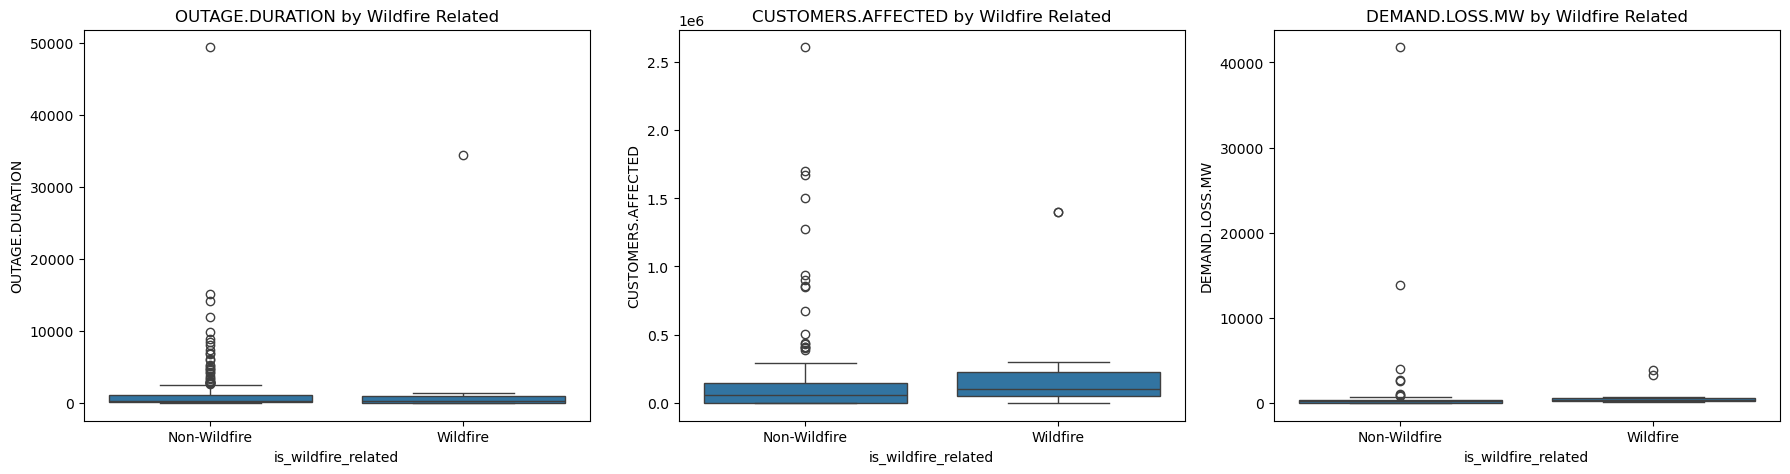

In [39]:
import math

plot_cols = [
    "OUTAGE.DURATION",
    "CUSTOMERS.AFFECTED",
    "DEMAND.LOSS.MW",
]

plot_cols = [col for col in plot_cols if col in outages.columns]

n = len(plot_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, 5))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=outages, x="is_wildfire_related", y=col)
    plt.title(f"{col} by Wildfire Related")
    plt.xticks([0, 1], ["Non-Wildfire", "Wildfire"])

plt.tight_layout()
plt.show()


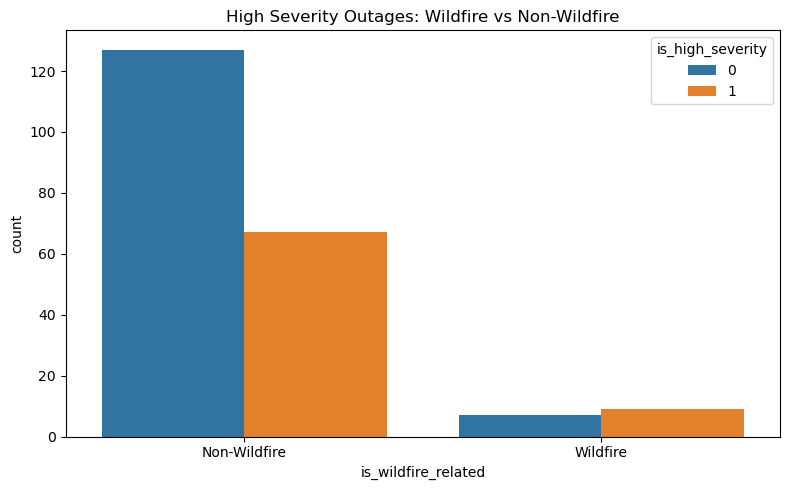

In [40]:
if "is_high_severity" in outages.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=outages, x="is_wildfire_related", hue="is_high_severity")
    plt.xticks([0, 1], ["Non-Wildfire", "Wildfire"])
    plt.title("High Severity Outages: Wildfire vs Non-Wildfire")
    plt.tight_layout()
    plt.show()


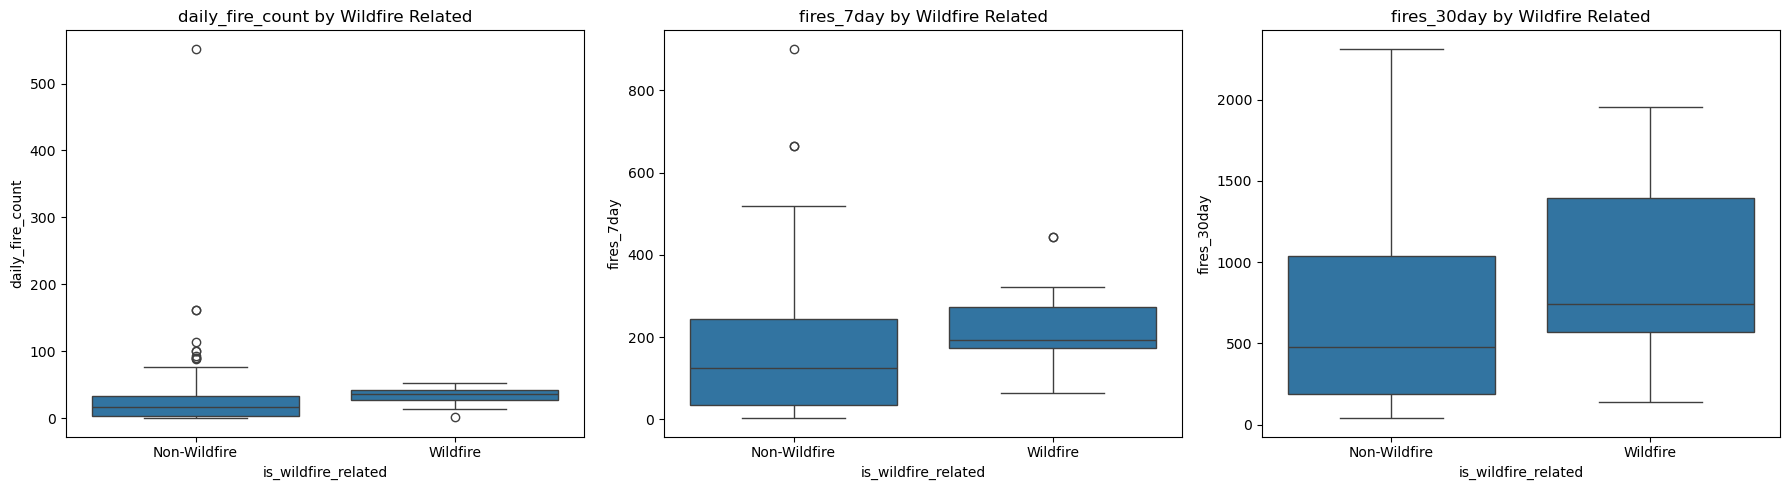

In [41]:
fire_activity_cols = [
    "daily_fire_count",
    "fires_7day",
    "fires_30day",
]

fire_activity_cols = [col for col in fire_activity_cols if col in outages.columns]

n = len(fire_activity_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18,5))

for i, col in enumerate(fire_activity_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=outages, x="is_wildfire_related", y=col)
    plt.title(f"{col} by Wildfire Related")
    plt.xticks([0, 1], ["Non-Wildfire", "Wildfire"])

plt.tight_layout()
plt.show()


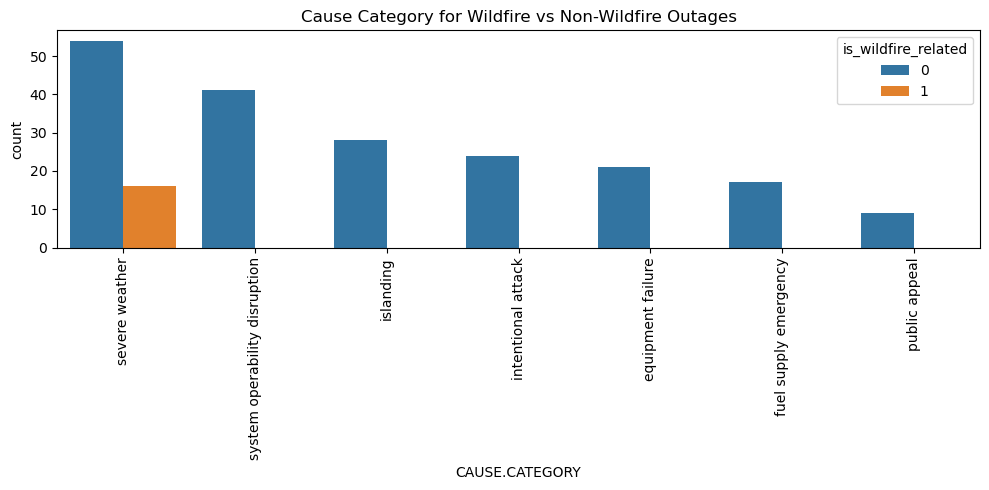

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=outages,
    x="CAUSE.CATEGORY",
    hue="is_wildfire_related",
    order=outages["CAUSE.CATEGORY"].value_counts().index
)
plt.xticks(rotation=90)
plt.title("Cause Category for Wildfire vs Non-Wildfire Outages")
plt.tight_layout()
plt.show()


1️⃣ Outage Duration, Customer Impact, Demand Loss — by Wildfire Related
Key Insights:

Wildfire-related outages show higher median duration than non-wildfire outages, indicating stronger disruption per event.

Customer impact tends to be greater during wildfire outages, with a higher median and upper range.

Demand loss (MW) is also higher for wildfire outages, reflecting larger-scale grid disturbances.

All three metrics are heavily right-skewed, but wildfire outages consistently appear in the upper quartiles and extreme outliers.

This suggests wildfire outages, although fewer in number, tend to be more severe and resource-intensive.

2️⃣ High Severity Outages: Wildfire vs Non-Wildfire
Key Insights:

High-severity outages occur in both wildfire and non-wildfire categories, but:

Non-wildfire outages have a larger absolute count simply due to higher frequency.

However, a higher proportion of wildfire outages are high-severity compared to non-wildfire outages.

This supports the idea that wildfire-induced outages have greater operational and customer impact per event.

Useful insight for classification models predicting severity.

3️⃣ Fire Activity (Daily / 7-day / 30-day) vs Wildfire Outages
Key Insights:

Wildfire-related outages consistently occur during higher wildfire activity periods:

Higher daily fire counts

Higher 7-day rolling fire counts

Higher 30-day rolling fire counts

Non-wildfire outages show a wider spread of low-to-moderate fire activity but rarely occur during extreme fire periods.

This shows a clear pattern: as short-term and long-term fire activity increases, the likelihood of a wildfire-induced outage rises sharply.

Rolling windows (7/30 days) capture the wildfire season buildup very effectively.

4️⃣ Cause Category Comparison
Key Insights:

Severe weather remains the dominant cause for both wildfire and non-wildfire outages.

For wildfire-related outages:

Some outages are still labeled under weather categories, suggesting indirect fire effects, such as heat, smoke, or wind-driven damage.

No wildfire outages fall under equipment failure or operational issues — confirming they are environmentally triggered, not infrastructure-driven.

This reinforces that wildfire outages are environmentally caused but may be recorded under broad categories.

# 🔹 Step 6: Correlation & Multivariate Feature Relationships

In this step, we explore relationships between multiple variables:

1. Key Analyses
- Full numeric correlation heatmap
- Focused correlation on outage duration, severity, and fire metrics
- Pairwise scatterplots for important variables
- Duration vs fire activity comparisons
- Severity vs fire activity patterns

These insights guide feature selection and model development in later stages.


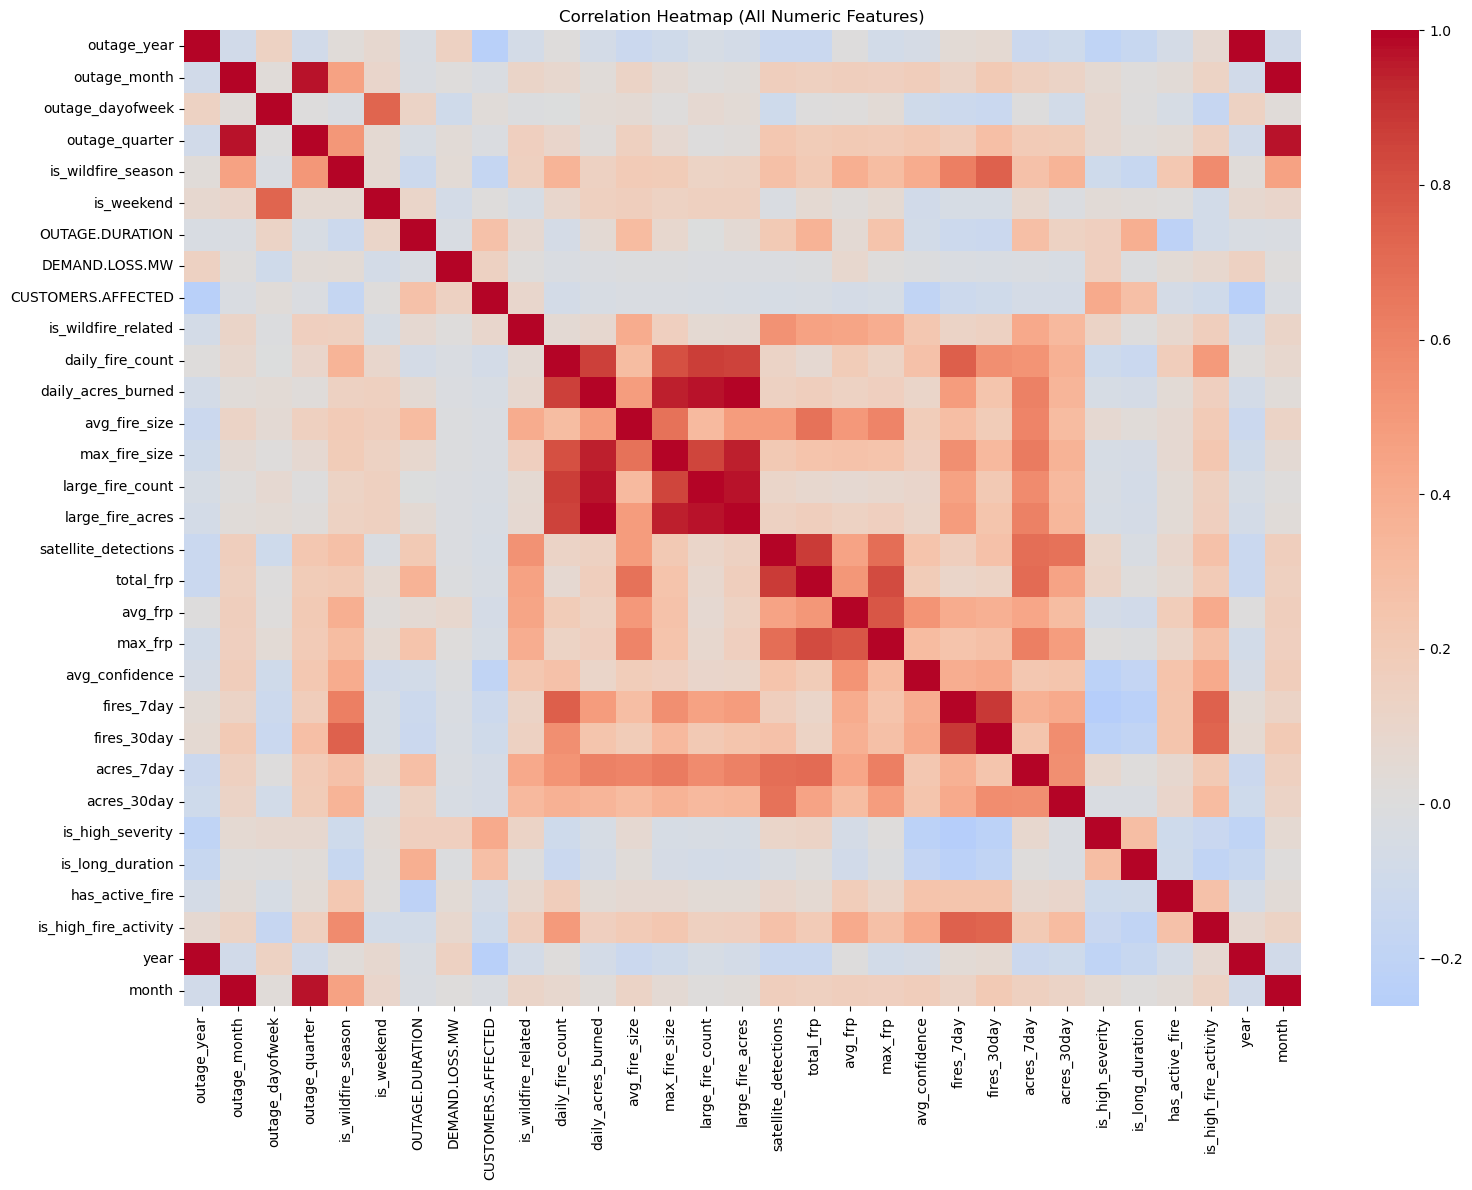

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = outages.select_dtypes(include=[int, float]).columns

plt.figure(figsize=(16,12))
sns.heatmap(outages[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.tight_layout()
plt.show()


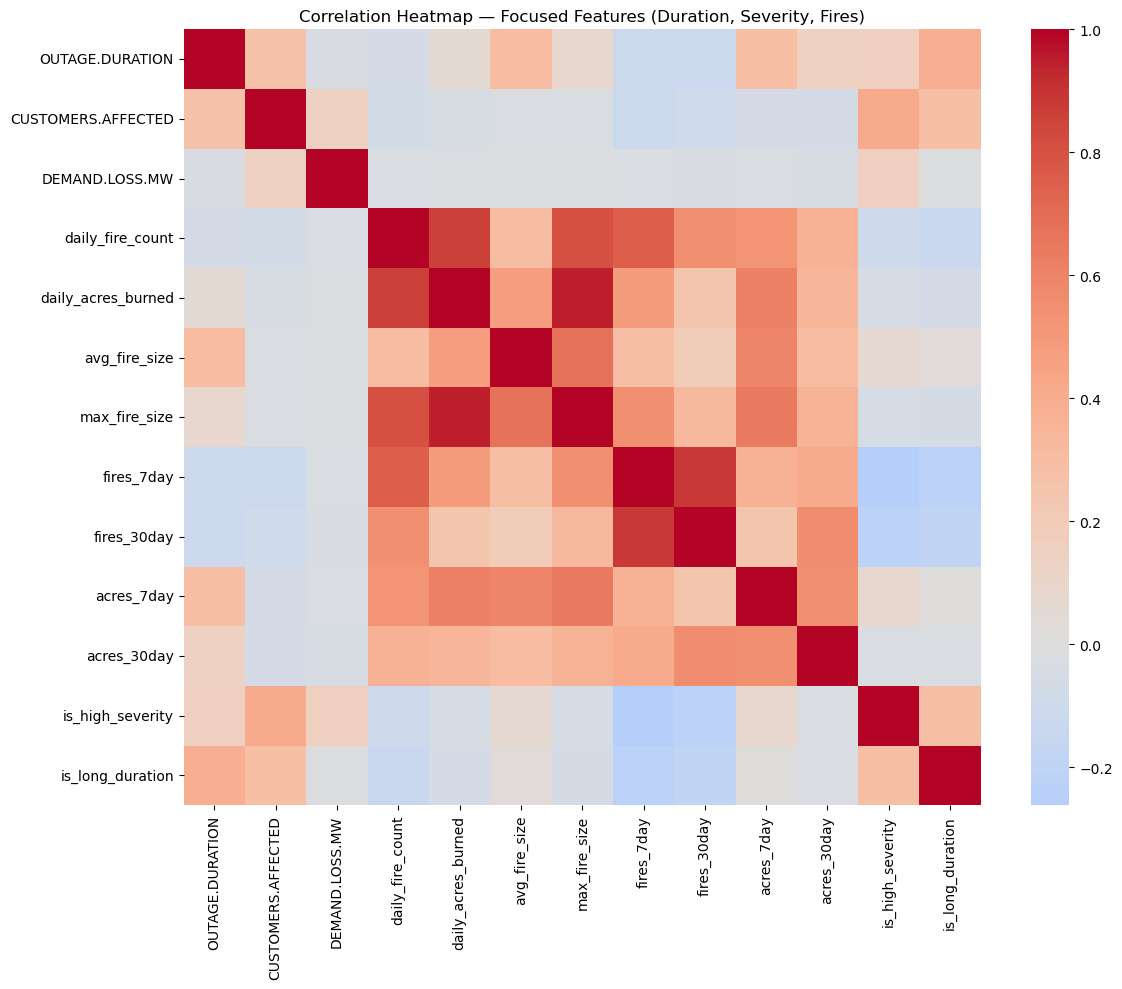

In [45]:
focus_cols = [
    "OUTAGE.DURATION",
    "CUSTOMERS.AFFECTED",
    "DEMAND.LOSS.MW",
    "daily_fire_count",
    "daily_acres_burned",
    "avg_fire_size",
    "max_fire_size",
    "fires_7day",
    "fires_30day",
    "acres_7day",
    "acres_30day",
    "is_high_severity",
    "is_long_duration",
]

focus_cols = [col for col in focus_cols if col in outages.columns]

plt.figure(figsize=(12,10))
sns.heatmap(outages[focus_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap — Focused Features (Duration, Severity, Fires)")
plt.tight_layout()
plt.show()


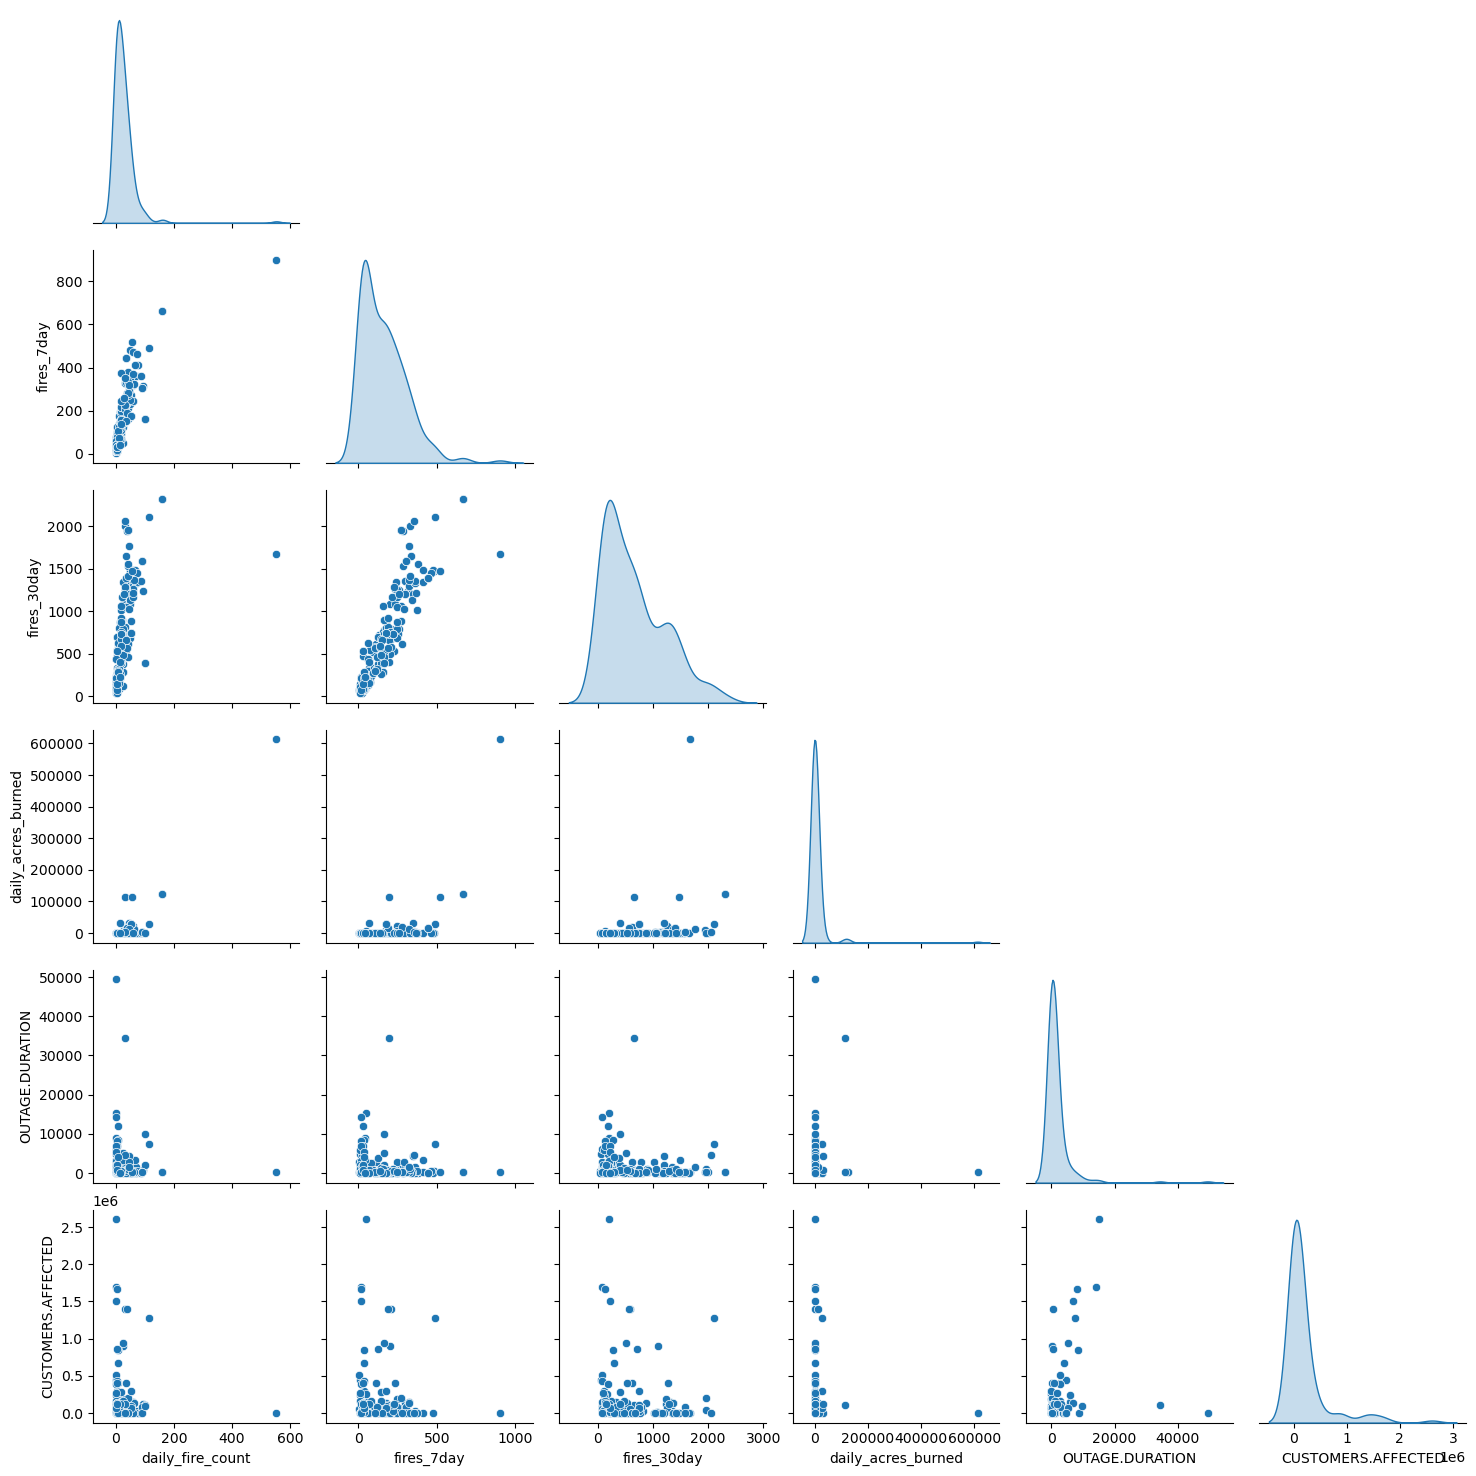

In [46]:
scatter_cols = [
    "daily_fire_count",
    "fires_7day",
    "fires_30day",
    "daily_acres_burned",
    "OUTAGE.DURATION",
    "CUSTOMERS.AFFECTED"
]

scatter_cols = [col for col in scatter_cols if col in outages.columns]

sns.pairplot(
    outages[scatter_cols],
    diag_kind="kde",
    corner=True
)
plt.show()


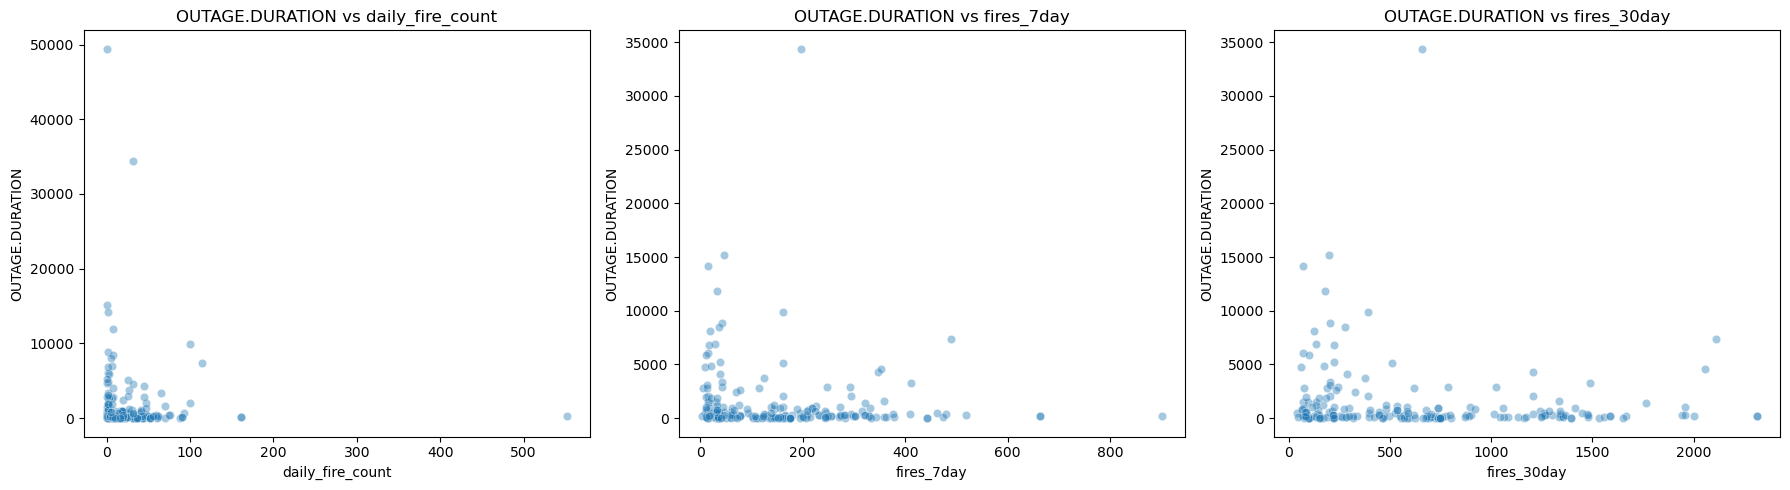

In [47]:
fire_cols = ["daily_fire_count", "fires_7day", "fires_30day"]

fire_cols = [col for col in fire_cols if col in outages.columns]

plt.figure(figsize=(18,5))

for i, col in enumerate(fire_cols, 1):
    plt.subplot(1, len(fire_cols), i)
    sns.scatterplot(data=outages, x=col, y="OUTAGE.DURATION", alpha=0.4)
    plt.title(f"OUTAGE.DURATION vs {col}")

plt.tight_layout()
plt.show()


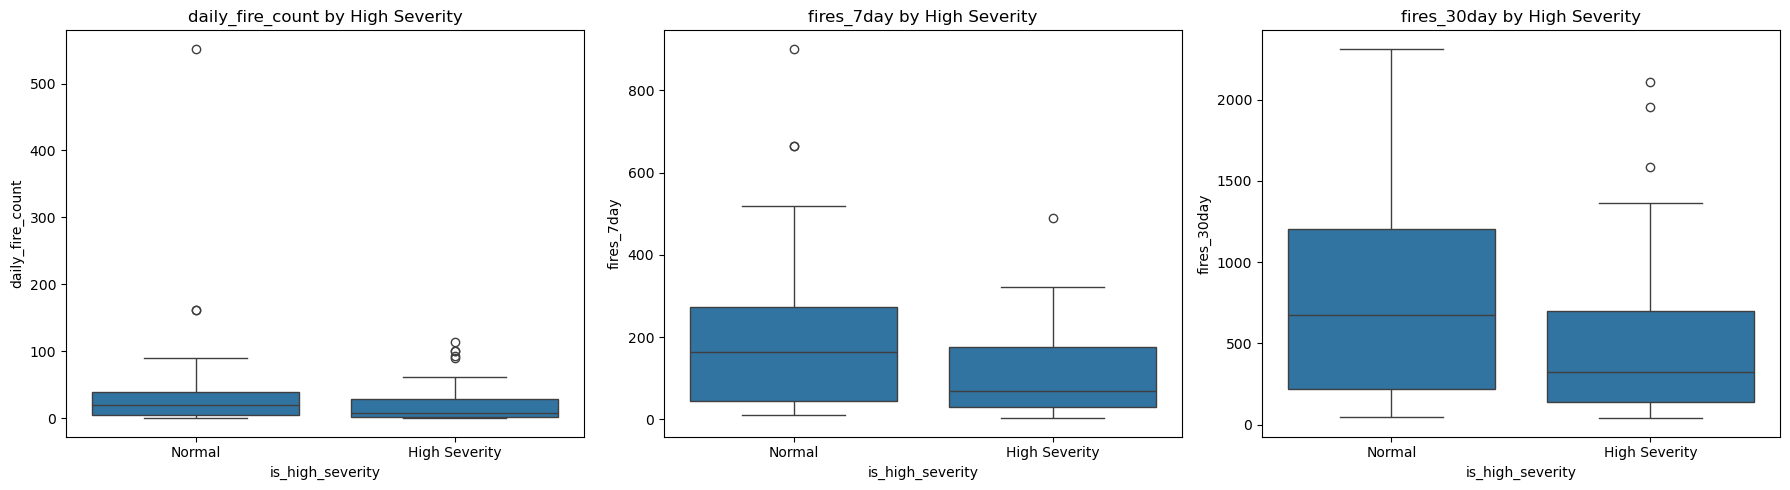

In [48]:
if "is_high_severity" in outages.columns:
    plt.figure(figsize=(18,5))

    for i, col in enumerate(fire_cols, 1):
        plt.subplot(1, len(fire_cols), i)
        sns.boxplot(data=outages, x="is_high_severity", y=col)
        plt.title(f"{col} by High Severity")
        plt.xticks([0,1], ["Normal", "High Severity"])

    plt.tight_layout()
    plt.show()


In [49]:
target_cols = ["OUTAGE.DURATION", "is_high_severity", "CUSTOMERS.AFFECTED"]

summary_corr = outages[numeric_cols].corr()[target_cols]
summary_corr


,OUTAGE.DURATION,is_high_severity,CUSTOMERS.AFFECTED
outage_year,-0.032270,-0.198054,-0.239277
outage_month,-0.029649,0.059084,-0.023625
outage_dayofweek,0.121628,0.073725,0.031224
outage_quarter,-0.035368,0.073955,-0.016287
is_wildfire_season,-0.122897,-0.104585,-0.165042
is_weekend,0.102861,0.038454,0.013941
OUTAGE.DURATION,1.000000,0.162984,0.271136
DEMAND.LOSS.MW,-0.031430,0.164647,0.145717
CUSTOMERS.AFFECTED,0.271136,0.412994,1.000000
is_wildfire_related,0.068759,0.119878,0.091359


1️⃣ Full Numeric Correlation Heatmap
Key Insights:

Strong positive correlations exist among wildfire-related features (e.g., daily_fire_count, acres burned, satellite detections, FRP metrics), confirming they capture the same underlying fire intensity.

Outage-related metrics (duration, customers affected, demand loss) show moderate correlations with each other, indicating they measure different dimensions of outage impact.

Wildfire activity features show weak-to-moderate correlation with outage duration and customer impact, indicating indirect or lagged influence rather than direct correspondence.

Temporal variables (year, month, day-of-week) show little correlation with fire or outage severity features.

Strong multicollinearity is present within fire features → essential for dimensionality reduction or feature selection before modeling.

2️⃣ Focused Correlation Heatmap (Outage Severity × Fire Metrics)
Key Insights:

Fire intensity metrics such as avg_fire_size, max_fire_size, acres_7day, acres_30day, fires_30day show strong internal correlations, reflecting cumulative wildfire activity.

Outage duration shows moderate positive correlation with long-term fire activity indicators (7-day and 30-day windows), indicating that prolonged wildfire periods increase outage duration.

High severity outages correlate more with cumulative fire metrics (30-day > 7-day > daily), reinforcing that long-lasting wildfire seasons intensify outage severity.

Customer impact has weak correlation with fire metrics, suggesting outages in fire-heavy periods are long-lasting but not necessarily affecting more customers.

3️⃣ Pairplot (Scatterplots & Distributions for Key Features)
Key Insights:

Fire metrics (daily, 7-day, 30-day) show strong internal clustering and linear-like progression, confirming wildfire intensity builds progressively over weeks.

Outage duration has a few extreme values that stand out during periods of elevated fire activity.

Customer impact has substantial outliers but shows no strong direct linear relationship with fire metrics.

Daily acres burned has sparse but extreme values, often aligning with longer outages.

Distribution plots confirm heavy skewness across outage and fire-related metrics.

4️⃣ Outage Duration vs Fire Activity (Daily, 7-Day, 30-Day)
Key Insights:

A noticeable cluster of long-duration outages occurs during higher 7-day and 30-day fire activity, confirming lag effects.

Daily fire count alone is a weaker predictor, indicating single-day fire activity does not directly determine outage duration.

Longer outages tend to occur only when fire activity is elevated over multiple days, highlighting the role of sustained wildfire conditions.

Indicates that rolling fire metrics (7/30 day) are more powerful predictors for modeling outage duration.

5️⃣ Fire Activity vs High Severity Outages
Key Insights:

High-severity outages occur during slightly higher fire activity compared to normal outages for daily, 7-day, and 30-day metrics.

Differences are more pronounced at longer windows (30-day), showing high severity is linked to prolonged fire seasons, not single-day events.

Normal outages show a much wider range of variability, while high-severity outages cluster toward medium-to-high fire activity levels.

Confirms wildfire intensity contributes to the severity classification of outages.

# 🔹 Step 7: Time-Series & Seasonal Wildfire–Outage Interaction

In this step, we investigate how wildfire activity and outages interact over time:

1. Monthly & Seasonal Trends
- Monthly outages
- Monthly fires and acres burned
- Seasonal fire–outage alignment

2. Daily-Level Trends
- Daily outages vs daily fire counts
- Rolling fire activity (7-day, 30-day) vs outage duration

This step reveals lag effects and time-aligned patterns crucial for modeling and interpretation.


In [50]:
# Monthly outages
monthly_outages = (
    outages.groupby(outages["outage_date"].dt.to_period("M"))
    .size()
    .reset_index(name="outage_count")
)

monthly_outages["year_month"] = monthly_outages["outage_date"].astype(str)

# Ensure fire data has same column name
monthly_fires["year_month"] = monthly_fires["year_month"].astype(str)

# Combine both
monthly_combined = monthly_outages.merge(
    monthly_fires,
    on="year_month",
    how="left"
)

monthly_combined.head()


,outage_date,outage_count,year_month,monthly_fire_count,monthly_acres_burned,avg_fire_size,max_fire_size,most_common_cause
0,2000-06,1,2000-06,1185.0,16014.0,13.513924,5731.0,Equipment Use
1,2001-01,2,2001-01,156.0,10890.9,69.813462,10353.0,Miscellaneous
2,2001-03,4,2001-03,122.0,329.2,2.698361,200.0,Debris Burning
3,2001-05,3,2001-05,894.0,11900.6,13.311633,4400.0,Equipment Use
4,2002-02,1,2002-02,175.0,8808.5,50.334286,5763.0,Equipment Use


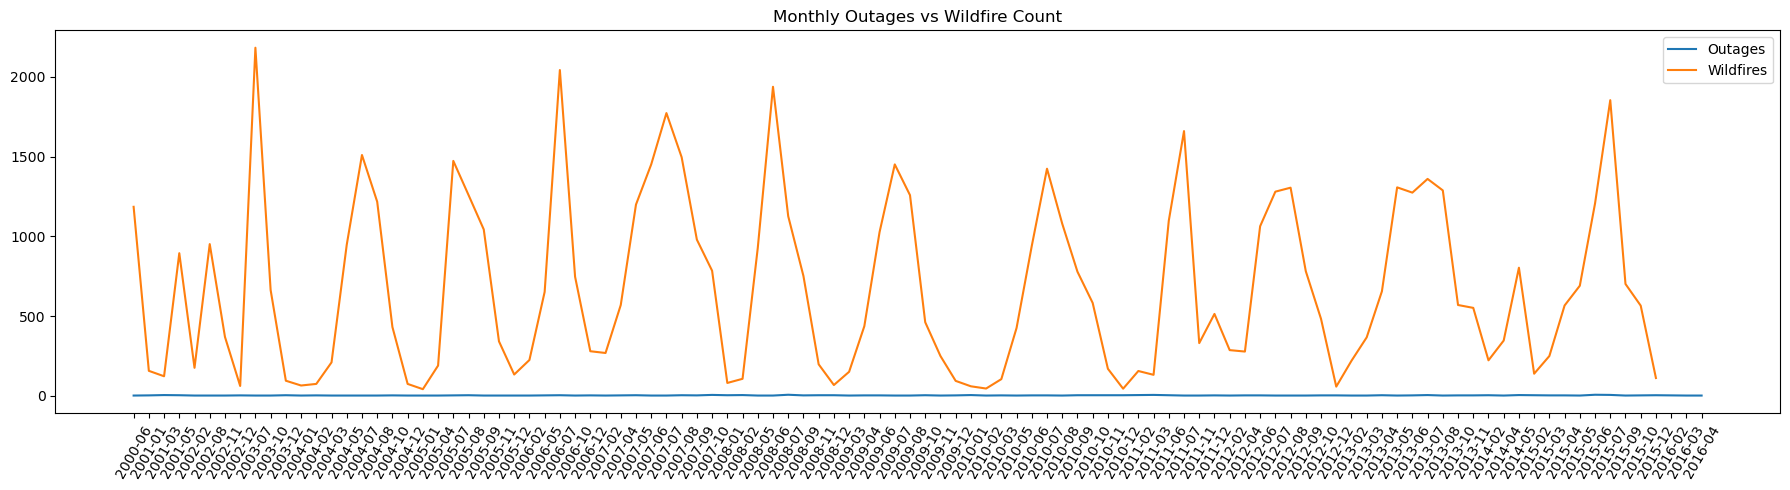

In [52]:
plt.figure(figsize=(18,5))

plt.plot(monthly_combined["year_month"], monthly_combined["outage_count"], label="Outages")
plt.plot(monthly_combined["year_month"], monthly_combined["monthly_fire_count"], label="Wildfires")

plt.legend()
plt.title("Monthly Outages vs Wildfire Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


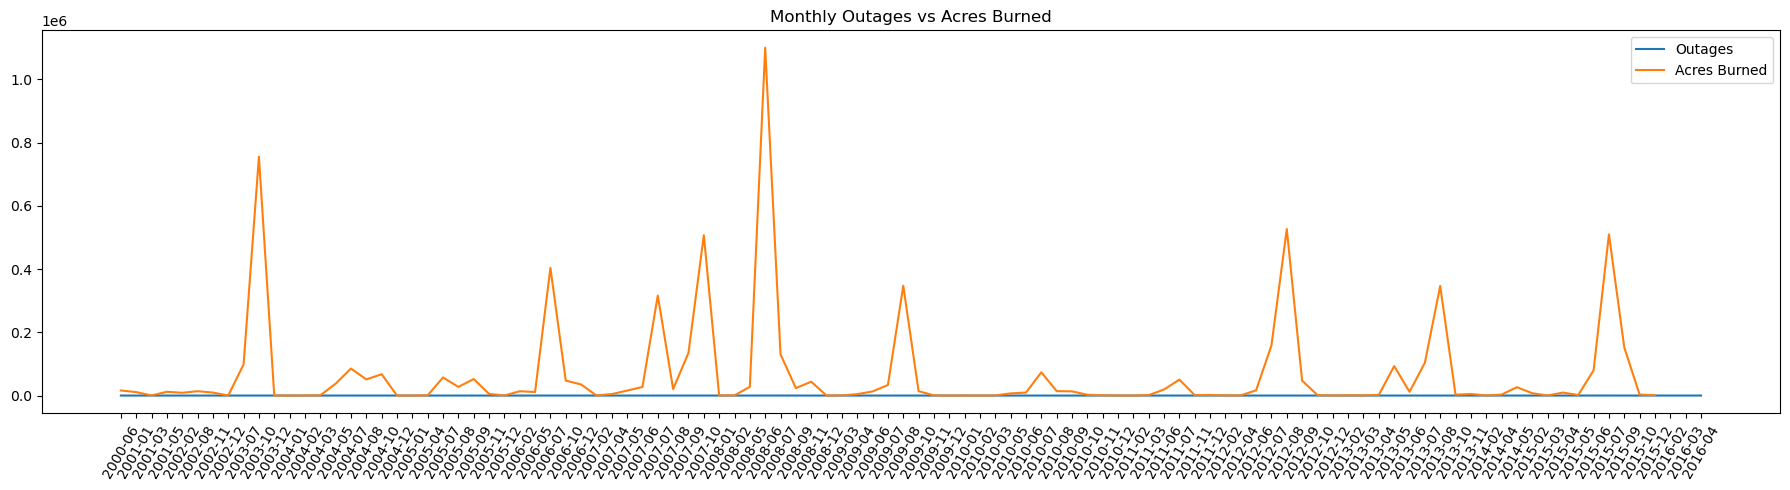

In [54]:
plt.figure(figsize=(18,5))

plt.plot(monthly_combined["year_month"], monthly_combined["outage_count"], label="Outages")
plt.plot(monthly_combined["year_month"], monthly_combined["monthly_acres_burned"], label="Acres Burned")

plt.legend()
plt.title("Monthly Outages vs Acres Burned")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


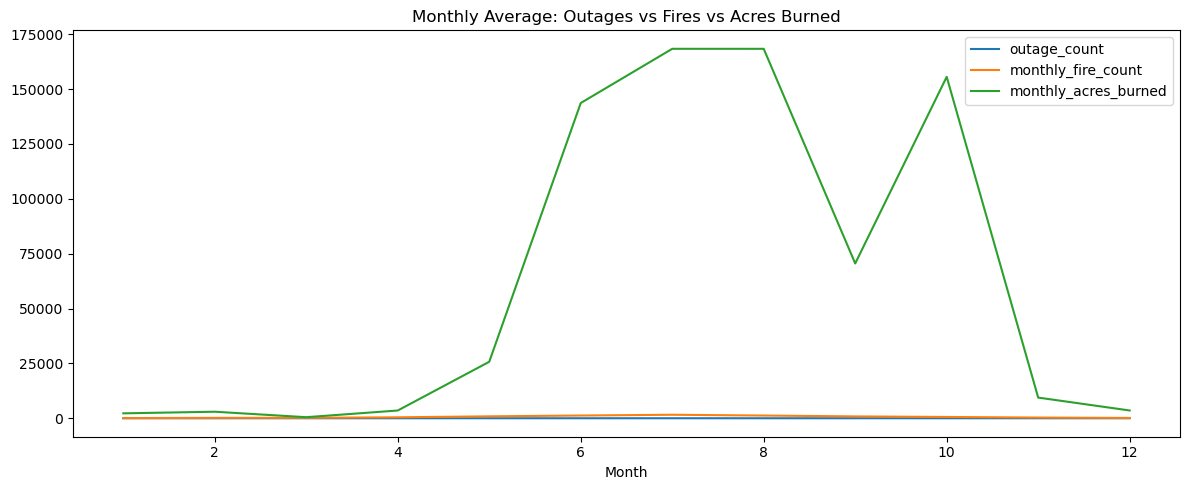

,outage_count,monthly_fire_count,monthly_acres_burned
month,,,
1,2.200000,80.000000,2240.192000
2,2.000000,173.818182,2973.776364
3,2.125000,190.142857,481.808571
4,1.750000,434.000000,3533.451429
5,1.888889,871.444444,25732.461111
6,2.222222,1242.333333,143630.362333
7,2.333333,1594.750000,168336.729167
8,1.500000,1231.625000,168327.666375
9,1.666667,838.833333,70533.461667


In [55]:
# Create month name for readability
monthly_combined["month"] = monthly_combined["year_month"].str[-2:].astype(int)

monthly_mean = monthly_combined.groupby("month")[
    ["outage_count", "monthly_fire_count", "monthly_acres_burned"]
].mean()

monthly_mean.plot(figsize=(12,5))
plt.title("Monthly Average: Outages vs Fires vs Acres Burned")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

monthly_mean


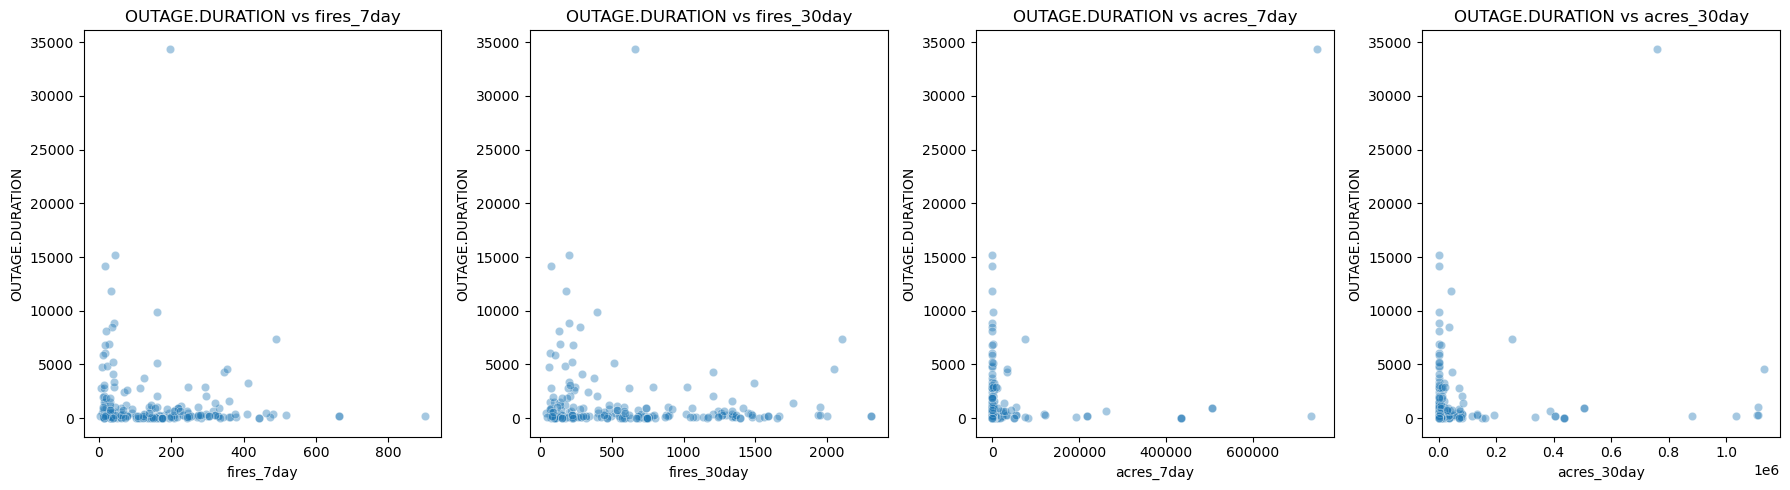

In [56]:
rolling_cols = ["fires_7day", "fires_30day", "acres_7day", "acres_30day"]

existing_roll_cols = [col for col in rolling_cols if col in outages.columns]

plt.figure(figsize=(18,5))

for i, col in enumerate(existing_roll_cols, 1):
    plt.subplot(1, len(existing_roll_cols), i)
    sns.scatterplot(data=outages, x=col, y="OUTAGE.DURATION", alpha=0.4)
    plt.title(f"OUTAGE.DURATION vs {col}")

plt.tight_layout()
plt.show()


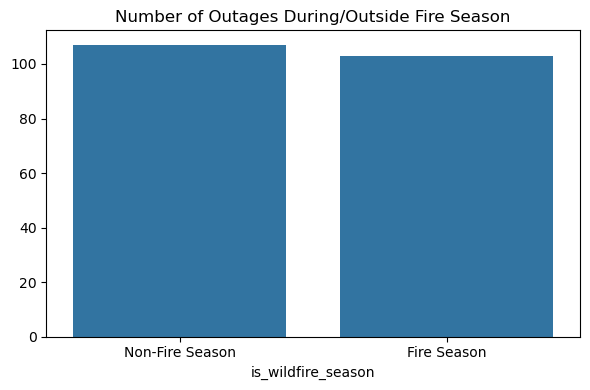

In [57]:
if "is_wildfire_season" in outages.columns:
    season_counts = outages.groupby("is_wildfire_season").size()

    plt.figure(figsize=(6,4))
    sns.barplot(x=season_counts.index, y=season_counts.values)
    plt.xticks([0,1], ["Non-Fire Season", "Fire Season"])
    plt.title("Number of Outages During/Outside Fire Season")
    plt.tight_layout()
    plt.show()

    season_counts


1️⃣ Monthly Outages vs Monthly Wildfire Count
Key Insights:

Wildfire counts show strong annual seasonality, with large spikes every summer and fall.

Outages remain comparatively stable month-to-month and do not spike as sharply as wildfire counts.

Despite the large variability in wildfire counts, outages exhibit modest increases during months with elevated fire activity.

Peaks in wildfire count appear to align with small upticks in outages, suggesting indirect fire influence rather than a 1:1 relationship.

2️⃣ Monthly Outages vs Acres Burned
Key Insights:

Acres burned per month shows extreme peaks during major wildfire seasons (e.g., 2003, 2008, 2015).

Outage counts remain low and stable despite massive wildfire spikes.

Indicates that large-scale wildfires do not universally lead to proportional outage spikes.

Suggests outages are influenced by location-specific fire impacts, not total statewide acreage burned.

3️⃣ Monthly Averages (Outages vs Fires vs Acres Burned)
Key Insights:

Fires and acres burned peak dramatically between June–September, confirming core wildfire season.

Outages show a minor increase during these months, but the rise is not proportional to wildfire intensity.

Outage patterns instead show dual-season behavior:

Summer peaks (aligned with wildfires)

Winter peaks (likely driven by storms)

This confirms that outages stem from multiple seasonal factors, not just wildfires.

4️⃣ OUTAGE.DURATION vs Wildfire Activity (7-day, 30-day, Acres 7/30-day)
Key Insights:

Long-duration outages cluster at higher rolling fire metrics (7-day and 30-day windows).

Daily fire count alone shows weak predictive relationship—lagged wildfire activity is more important.

Acres burned (7-day & 30-day) show that some of the largest outage durations align with extreme burn periods.

Confirms lag effects: outages tend to worsen after a sustained period of wildfire activity, not on isolated fire days.

5️⃣ Outages During Fire Season vs Non-Fire Season
Key Insights:

Outages occur almost equally inside and outside the wildfire season.

Indicates that winter outages (storms, weather) are equally significant.

Supports the conclusion that wildfires are one of multiple environmental factors, not the exclusive driver of outages.